# Ground deformation and monitoring

Volcanoes often exhibit geophysical and geochemical signals before, during and after an eruption. These signals allow volcanologists to monitor active volcanoes to gain knowledge about processes in the magma chamber, conduit and edifice and to potentially predict the time and location of a future eruption. One type of geophysical signal is the deformation or movement of the volcanic edifice and surrounding crust. Changes in the surface of the volcano are related to magma intrusion, dome growth, pressure increase in the magma chamber or flank instability. In this exercise you will learn how surface deformation signals can be related to pressure and volume changes in magma chambers. 

## Part 1: Model surface deformation

Calculate a model for surface deformation at a volcano in terms of vertical and horizontal displacement components (cm) of the ground as a function of the distance away from the center of deformation, following Mogi (1958) formulation. Surface deformation can be expressed by a spherical pressure source buried in an elastic medium. Therefore, a change in pressure (or in volume) at the source level causes a displacement at the surface:

**Horizontal displacement:**
$$U_z = \frac{3a^3\ \Delta P\ d}{4G\sqrt{(d^2+r^2)^3}}$$
**Vertical displacement:**
$$U_r = \frac{3a^3\ \Delta P\ r}{4G\sqrt{(d^2+r^2)^3}}$$

Where:

- $a$: Radius of the source sphere [km]
- $b$: Depth to the center of the source sphere [km]
- $G$: Shear modulus [GPa]
- $\Delta P$: change in pressure in the sphere [MPa]
- $r$: Radial distance on the surface [km]
- $U_r$: Horizontal displacement [m]
- $U_rz$: Vertical displacement [m]


We first start by importing the main libraries we will be using:
- `pandas` is useful for tabulated data (e.g., such as an Excel table)
- `numpy` provides the most common math functions 

We then create a pandas *dataframe*, which is the main object that will store our data. 

In [33]:
# Importing the main libraries we are going to use
import pandas as pd # Used to store the data 
import numpy as np # Used to perform the calculations
import matplotlib.pyplot as plt # Used to plot the data

import os 
print(os.curdir)
# # Creating a dataframe - don't worry too much about this for now
# df = pd.DataFrame({'r': [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 10, 15, 20, 25, 30], 'ur_m': [0]*16, 'uz_m': [0]*16, 'ur_cm': [0]*16, 'uz_cm': [0]*16})
# # Displaying the dataframe
# print(df)

ModuleNotFoundError: No module named 'deformation_functions'

We now have a *dataframe* variable called `df` that contains the radial distance on the surface stored in the column called `r`. Let's review the most basic commands we will use:

##### Pandas

- To access the values of a column: 
    ```python
      df['r']
    ```
- To set a new value to a column: 
    ```python
      df['ur_m'] = 2.5
    ```
- To fill the value of a column based on calculations that depend on another column: 
    ```python
      df['ur_cm'] = df['ur_m']*1e2
    ```

##### Arithmetic operations

- Power: Using `**`
  - `2**3` is equal to 8

- Square root: `np.sqrt()`
  - `np.sqrt(9)` is equal to 3
  - Alternatively `9**1/3` is also equal to 3

##### Combining both

- You can easily use `numpy` operators with `pandas`:

    ```python
      df['ur_cm'] = np.sqrt(df['r'])
    ```

Back to the objective: we want to compute the vertical ($U_r$) and horizontal ($U_z$) displacements as a function of radial distance `r` using the appropriate equations

       r      ur_m      uz_m     ur_cm     uz_cm
0    0.0  0.000000  0.020000  0.000000  2.000000
1    0.5  0.001970  0.019704  0.197037  1.970371
2    1.0  0.003771  0.018857  0.377146  1.885732
3    1.5  0.005272  0.017575  0.527244  1.757479
4    2.0  0.006403  0.016008  0.640329  1.600822
5    2.5  0.007155  0.014311  0.715542  1.431084
6    3.0  0.007566  0.012610  0.756611  1.261019
7    3.5  0.007697  0.010996  0.769748  1.099640
8    4.0  0.007618  0.009523  0.761823  0.952279
9    4.5  0.007392  0.008213  0.739188  0.821319
10   5.0  0.007071  0.007071  0.707107  0.707107
11  10.0  0.003578  0.001789  0.357771  0.178885
12  15.0  0.001897  0.000632  0.189737  0.063246
13  20.0  0.001141  0.000285  0.114134  0.028534
14  25.0  0.000754  0.000151  0.075429  0.015086
15  30.0  0.000533  0.000089  0.053319  0.008886


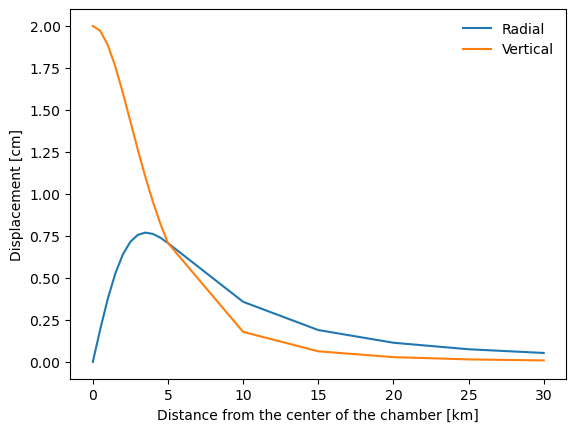

In [26]:
# Setting the main model parameters
G = 30 # Shear modulus [GPa]
dP = 20 # Pressure difference [MPa]
a = 1 # Chamber radius [km]
d = 5 # Chamber depth [km]

# Calculate the radial and vertical displacements
df['ur_m'] = (3*a**3*dP*df['r'])/(4*G*np.sqrt((d**2+df['r']**2)**3))
df['uz_m'] = (3*a**3*dP*d)/(4*G*np.sqrt((d**2+df['r']**2)**3))

# Convert the results to cm
df['ur_cm'] = df['ur_m']*1e2
df['uz_cm'] = df['uz_m']*1e2

# Display the results
print(df)

# Plotting the results
fig, ax = plt.subplots()
ax.plot(df['r'], df['ur_cm'], label='Radial')
ax.plot(df['r'], df['uz_cm'], label='Vertical')
ax.set_xlabel('Distance from the center of the chamber [km]')
ax.set_ylabel('Displacement [cm]')
plt.legend(frameon=False)


### Question 1:

Look at the vertical and horizontal components vs the distance. How do these curves differ?

## Part 2: Constrain the depth of the magma chamber

Some time after the activity state of the volcano changes, you are provided with GPS data measured at four stations. A pressure change of 70 MPa and a shear modulus of 30 GPa were estimated with other methods. 

You are asked to try to constrain the depth of the magma chamber, knowing that past estimations calculated a chamber radius of 2.5 km and chamber depths around 6-12 km.


 (iterate the model calculation for several depths). Use a Pearson’s $\Chi^2$ test compare the displacements results with the GPS measurements.

$$
\Chi^2 = \sum_{i=1}^{n} \frac{(O_i - E_i)^2}{E_i}
$$

where:
- $O_i$ is the modelled value,
- $E_i$ is the expected value,
- $n$ is the number of observations.
                         
                                    
                                    

In [29]:

# Create a dataframe that replicates what is on the clipboard
data = {
    'GNSS station': ['LP03', 'ARID', 'LP04', 'MOLU'],
    'r': [5.1, 5.8, 8.9, 10.7],
    'observed_uz': [0.220, 0.151, 0.098, 0.030],
    'observed_ur': [0.120, 0.196, 0.122, 0.045],
    'modelled_uz': [0]*4,
    'modelled_ur': [0]*4,
    'chi_uz': [0]*4,
    'chi_ur': [0]*4
}
df_stations = pd.DataFrame(data).set_index('GNSS station')

# Display the dataframe
print(df_stations)

total_chi = pd.DataFrame({'r': [6,7,8,9,10,11,12], 'total_chi': [0]*7}).set_index('GNSS station')

                 r  observed_uz  observed_ur  modelled_uz  modelled_ur  \
GNSS station                                                             
LP03           5.1        0.220        0.120            0            0   
ARID           5.8        0.151        0.196            0            0   
LP04           8.9        0.098        0.122            0            0   
MOLU          10.7        0.030        0.045            0            0   

              chi_uz  chi_ur  
GNSS station                  
LP03               0       0  
ARID               0       0  
LP04               0       0  
MOLU               0       0  
